# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

# Carga de datos y procesado

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = 'drive/MyDrive/TFM/datasets/'

In [3]:
path = 'E:/Documentos/VIU/TFM/Montesinho/'

In [4]:
df = pd.read_csv(path + "forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
print ("El dataset contiene "+ str(df.shape[0]) + " muestras y " + str(df.shape[1]) + " atributos.")

El dataset contiene 517 muestras y 13 atributos.


In [ ]:
df.columns.values

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'], dtype=object)

Se comprueba si hay variables nulas

In [ ]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Descripción de las variables numéricas

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


En la tabla anterior podemos ver como el area y la lluvia (rain) tiene valores máximos muy alejados del percentil 75, por lo que se van a estudiar en un poco más de detalle a continuación.

# Plot lluvia y área

E:\Programas\Anaconda\envs\tfm\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


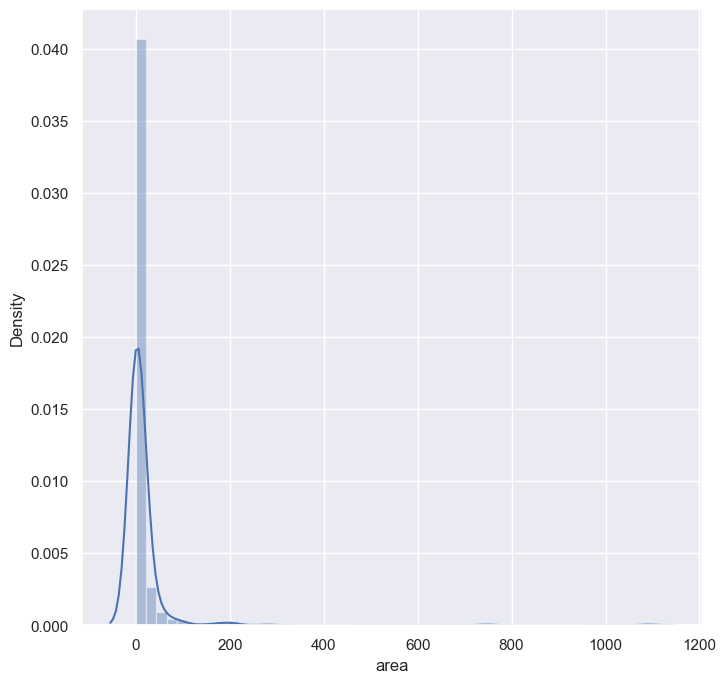

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(df['area']);

E:\Programas\Anaconda\envs\tfm\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


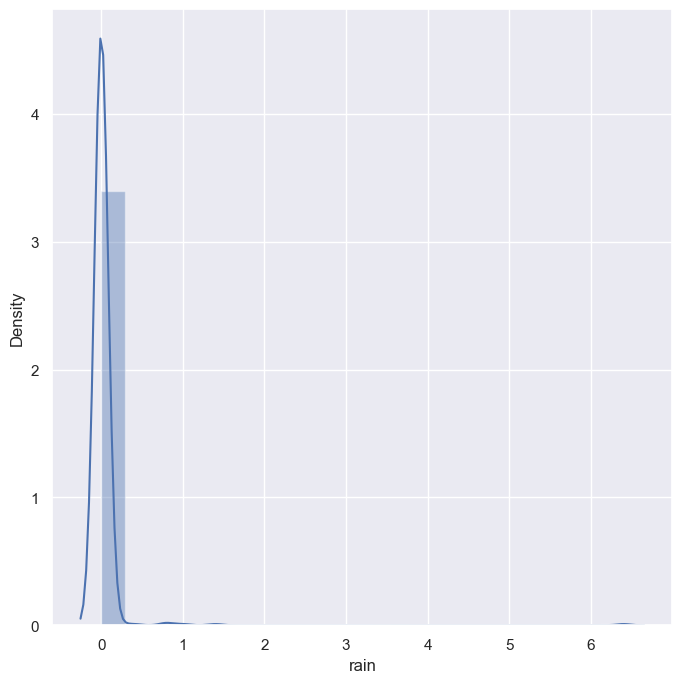

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(df['rain']);

A continuación se filtra la variable area para crear la variable tamanyo. La cual va a indicar con un 1 si se ha originado un incendio, por pequeño que sea, o un 0 si todo se mantiene tranquilo.

In [5]:
df['tamanyo'] = np.where(df['area']>0, '1', '0')
df['tamanyo']= pd.to_numeric(df['tamanyo'])
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,tamanyo
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


## Escalado de las dos variables anteriores 

Como se observa en las dos gráficas anteriores, presentan una asimetría a derechas, así que se va a intentar reescalar mediante una transformación logarítmica usando log(n + 1) el +1 se añade para prevenir los errores en 0.

In [6]:
df['area_log'] = np.log(df['area'] + 1)

In [7]:
df['rain_log'] = np.log(df['rain'] + 1)

## Comparación escalado

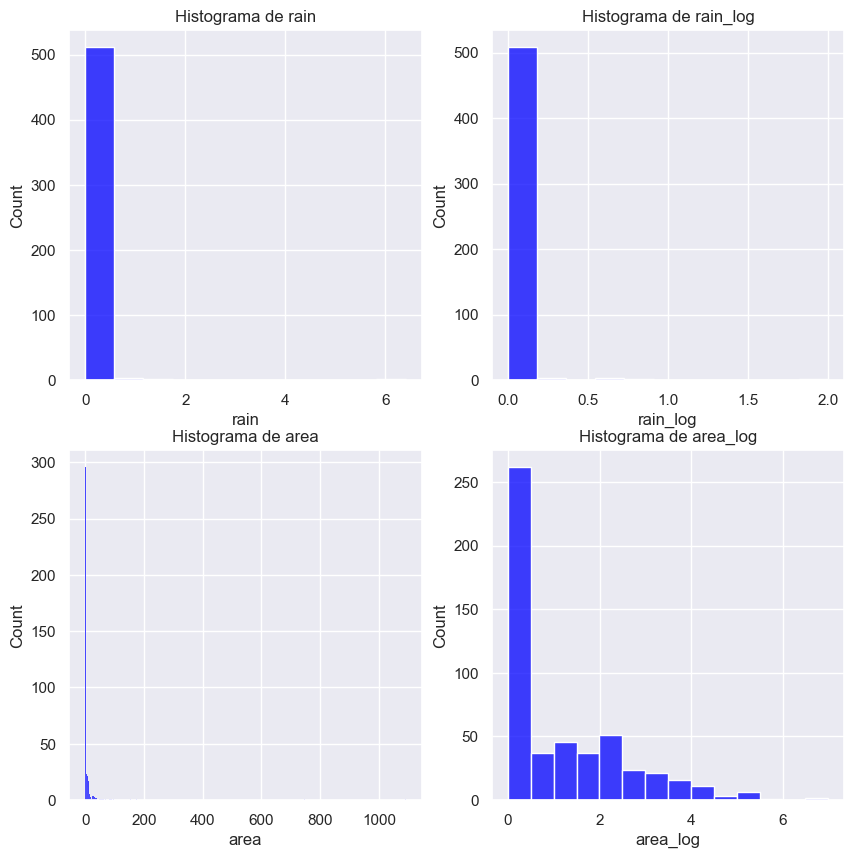

In [ ]:
val_cols = ['rain','rain_log','area','area_log' ]

fig, axs =  plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axs = np.ravel(axs)

for i, col in enumerate(val_cols[:]):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, color='blue').set(title='Histograma de ' + col)
    
plt.show()

En la lluvia no ha sido de gran ayuda, pero en el área sí ha corregido bastante la gráfica

In [8]:
df = df.drop(['area', 'rain'], axis=1)
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,tamanyo,area_log,rain_log
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0.000000,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0,0.000000,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0.000000,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0,0.000000,0.182322
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,1,2.006871,0.000000
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,1,4.012592,0.000000
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,1,2.498152,0.000000
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.000000,0.000000


# Creación de nuevas variables a partir de los datos

Para transformar la variable de los días de la semana, se convierte de una lista de strings ["Lunes", "Martes"...] a un booleano que indica True si es fin de semana (viernes, sábado o domingo), y un False si es entre semana.

In [9]:
df['day'] = (df['day'] == 'fri') | (df['day'] == 'sat') | (df['day'] == 'sun')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,tamanyo,area_log,rain_log
0,7,5,mar,True,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0.000000,0.000000
1,7,4,oct,False,90.6,35.4,669.1,6.7,18.0,33,0.9,0,0.000000,0.000000
2,7,4,oct,True,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0.000000,0.000000
3,8,6,mar,True,91.7,33.3,77.5,9.0,8.3,97,4.0,0,0.000000,0.182322
4,8,6,mar,True,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,True,81.6,56.7,665.6,1.9,27.8,32,2.7,1,2.006871,0.000000
513,2,4,aug,True,81.6,56.7,665.6,1.9,21.9,71,5.8,1,4.012592,0.000000
514,7,4,aug,True,81.6,56.7,665.6,1.9,21.2,70,6.7,1,2.498152,0.000000
515,1,4,aug,True,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.000000,0.000000


In [10]:
df_area = df[df['area_log']>0]
df_area

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,tamanyo,area_log,rain_log
138,9,9,jul,False,85.8,48.3,313.4,3.9,18.0,42,2.7,1,0.307485,0.000000
139,1,4,sep,False,91.0,129.5,692.6,7.0,21.7,38,2.2,1,0.357674,0.000000
140,2,5,sep,False,90.9,126.5,686.5,7.0,21.9,39,1.8,1,0.385262,0.000000
141,1,2,aug,False,95.5,99.9,513.3,13.2,23.3,31,4.5,1,0.438255,0.000000
142,8,6,aug,True,90.1,108.0,529.8,12.5,21.2,51,8.9,1,0.476234,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,aug,True,91.0,166.9,752.6,7.1,21.1,71,7.6,1,1.153732,0.875469
510,6,5,aug,True,91.0,166.9,752.6,7.1,18.2,62,5.4,1,0.357674,0.000000
512,4,3,aug,True,81.6,56.7,665.6,1.9,27.8,32,2.7,1,2.006871,0.000000
513,2,4,aug,True,81.6,56.7,665.6,1.9,21.9,71,5.8,1,4.012592,0.000000


E:\Programas\Anaconda\envs\tfm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Programas\Anaconda\envs\tfm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


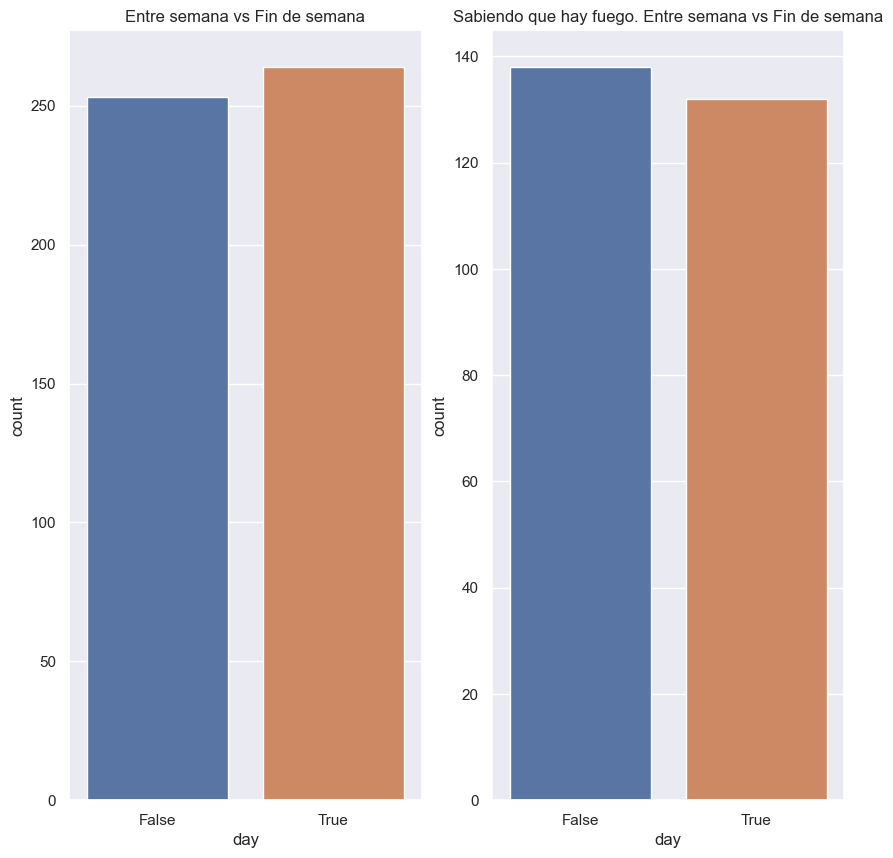

In [ ]:
fig, axs =  plt.subplots(nrows=1, ncols=2, figsize=(10,10))
plt.sca(axs[0])
sns.countplot(df['day'])
plt.title('Entre semana vs Fin de semana');

plt.sca(axs[1])
sns.countplot(df_area['day'])
plt.title('Sabiendo que hay fuego. Entre semana vs Fin de semana');

Para transformar la variable de los meses, se convierte la string que indica los meses del año, a un booleano que es True si se trata de los meses más calurosos del año, o False si es el resto.

In [11]:
df['month'] = ((df['month'] == 'jun') | (df['month'] == 'jul') | (df['month'] == 'aug') | (df['month'] == 'sep'))
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,tamanyo,area_log,rain_log
0,7,5,False,True,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0.000000,0.000000
1,7,4,False,False,90.6,35.4,669.1,6.7,18.0,33,0.9,0,0.000000,0.000000
2,7,4,False,True,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0.000000,0.000000
3,8,6,False,True,91.7,33.3,77.5,9.0,8.3,97,4.0,0,0.000000,0.182322
4,8,6,False,True,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,True,True,81.6,56.7,665.6,1.9,27.8,32,2.7,1,2.006871,0.000000
513,2,4,True,True,81.6,56.7,665.6,1.9,21.9,71,5.8,1,4.012592,0.000000
514,7,4,True,True,81.6,56.7,665.6,1.9,21.2,70,6.7,1,2.498152,0.000000
515,1,4,True,True,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.000000,0.000000


In [ ]:
df_area_2 = df[df['area_log']>0]
df_area_2

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,tamanyo,area_log,rain_log
138,9,9,True,False,85.8,48.3,313.4,3.9,18.0,42,2.7,0,0.307485,0.000000
139,1,4,True,False,91.0,129.5,692.6,7.0,21.7,38,2.2,0,0.357674,0.000000
140,2,5,True,False,90.9,126.5,686.5,7.0,21.9,39,1.8,0,0.385262,0.000000
141,1,2,True,False,95.5,99.9,513.3,13.2,23.3,31,4.5,0,0.438255,0.000000
142,8,6,True,True,90.1,108.0,529.8,12.5,21.2,51,8.9,0,0.476234,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,True,True,91.0,166.9,752.6,7.1,21.1,71,7.6,0,1.153732,0.875469
510,6,5,True,True,91.0,166.9,752.6,7.1,18.2,62,5.4,0,0.357674,0.000000
512,4,3,True,True,81.6,56.7,665.6,1.9,27.8,32,2.7,0,2.006871,0.000000
513,2,4,True,True,81.6,56.7,665.6,1.9,21.9,71,5.8,1,4.012592,0.000000


E:\Programas\Anaconda\envs\tfm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Programas\Anaconda\envs\tfm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


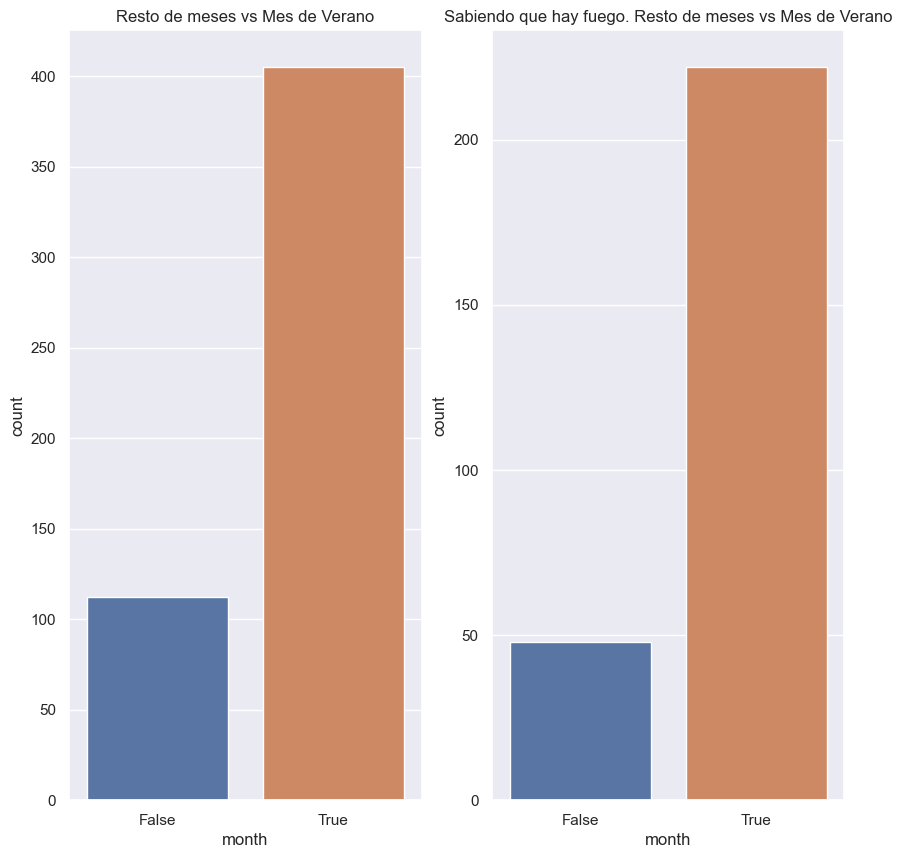

In [ ]:
fig, axs =  plt.subplots(nrows=1, ncols=2, figsize=(10,10))
plt.sca(axs[0])
sns.countplot(df['month'])
plt.title('Resto de meses vs Mes de Verano');

plt.sca(axs[1])
sns.countplot(df_area_2['month'])
plt.title('Sabiendo que hay fuego. Resto de meses vs Mes de Verano');

# Gráficas variables numéricas

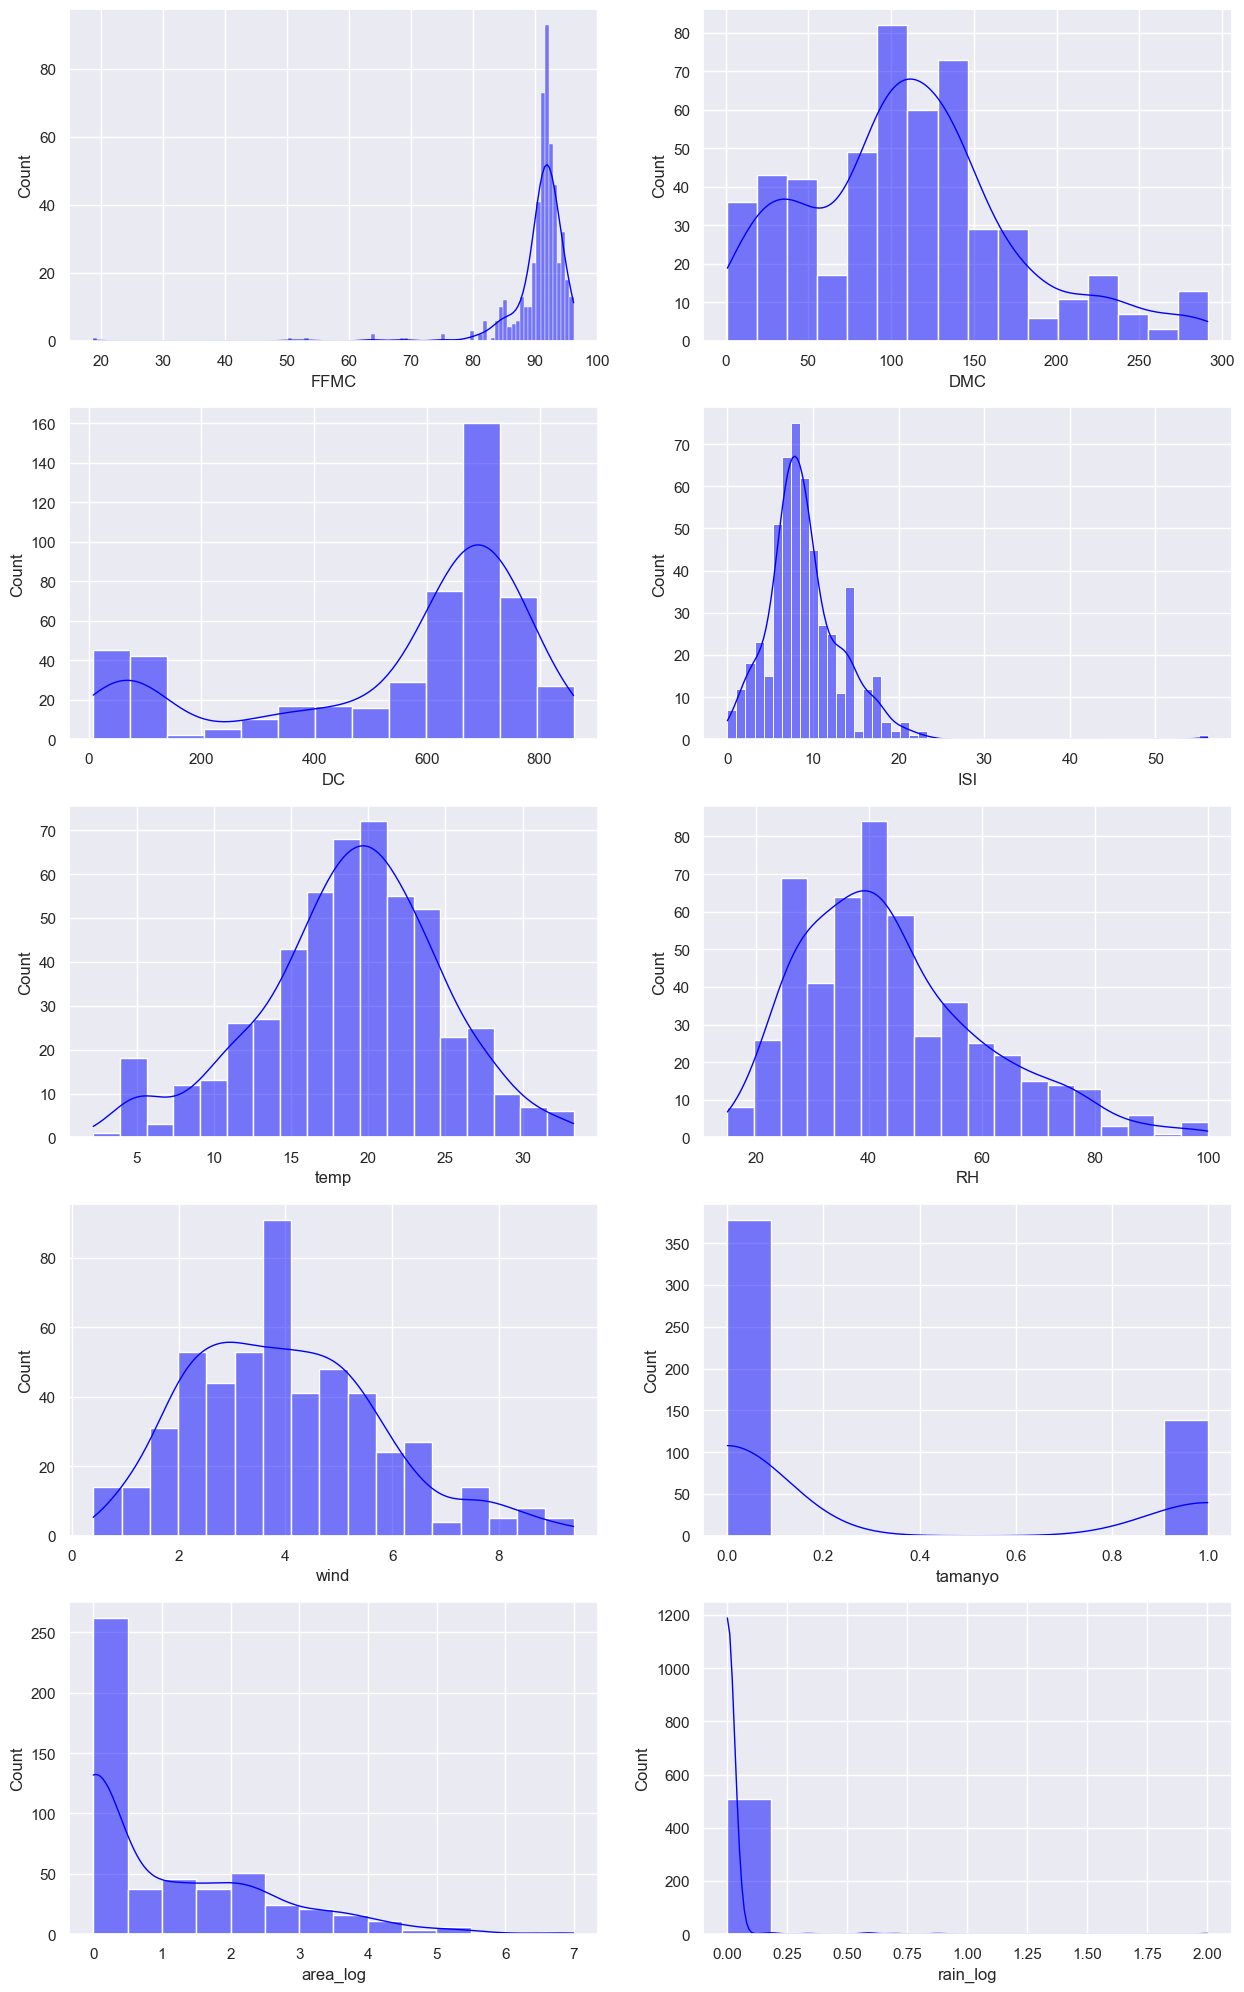

In [ ]:
num_cols = df.select_dtypes(include='number').columns

fig, axs =  plt.subplots(nrows=5, ncols=2, figsize=(15,25))
axs = np.ravel(axs)

for i, col in enumerate(num_cols[2:]):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'linewidth':1, 'linestyle':'-'}, color='blue')
    

plt.show()

# Mapa de calor

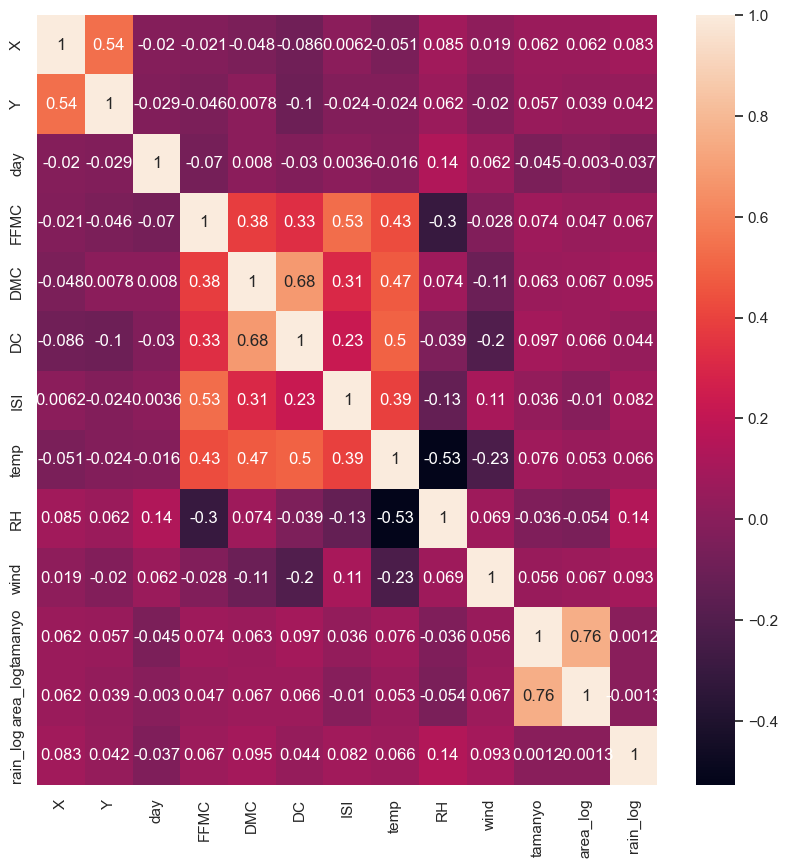

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(font_scale = 1)
sns.heatmap(df.corr(), annot = True);

# Train test split

In [12]:
target = df['tamanyo']
features = df.drop(columns = 'tamanyo')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (413, 13)
Test data set size :  (104, 13)


# Escalado de todas las variables

In [14]:
scaler = StandardScaler()

In [15]:
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

Variables

In [16]:
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)

Variable objetivo

In [17]:
y_test = pd.DataFrame(y_test, columns = ['tamanyo'])
y_train = pd.DataFrame(y_train, columns = ['tamanyo'])
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area_log,rain_log
0,-0.293766,-0.927776,0.53287,0.943880,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,0.219260,-0.137348
1,-0.293766,-0.161993,0.53287,-1.059457,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,0.177491,-0.137348
2,-1.130796,0.603791,0.53287,-1.059457,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,0.180797,-0.137348
3,-0.712281,-0.161993,0.53287,-1.059457,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,1.087255,-0.137348
4,0.124750,-0.161993,-1.87663,0.943880,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,0.578923,-0.137348


# KNN

In [ ]:
from sklearn import preprocessing, neighbors

In [ ]:
n_neighbors = 2

knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X_train,y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
n_neighbors = 2

knn = neighbors.KNeighborsClassifier(n_neighbors)

#To return in 1D array
y_train = np.ravel(y_train)

knn.fit(X_train,y_train)

print('Precisión del K-NN classifier en el training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Precisión del K-NN classifier en el test set: {:.2f}'.format(knn.score(X_test, y_test)))

Precisión del K-NN classifier en el training set: 0.88
Precisión del K-NN classifier en el test set: 0.82


## k-Fold Cross-Validation

La validación cruzada es cuando un dataset se divide de forma aleatoria en k grupos. Uno de los grupos es utilizado como test y el resto como entrenamiento. Entonces se entrena el modelo y se comprueban los resultados. Así durante esas k veces se comprueba la eficacia del modelo, esto se utiliza para mostrar una métrica más real, ya que dependiendo de la división en train y test puede obtener mejores o peores resultados. Aplicando esta técnica 5 veces, y después calculando la media de los resultados de precisión, obtenedremos unos resultados más cercanos a la realidad.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn_cv = neighbors.KNeighborsClassifier(n_neighbors=2)

cv_scores = cross_val_score(knn_cv, X_train,y_train, cv=5)

print('Los 5 valores de precisión son:')
print(cv_scores)
print('La media de los valores anteriores es {}'.format(np.mean(cv_scores)))

Los 5 valores de precisión son:
[0.81927711 0.69879518 0.74698795 0.7804878  0.79268293]
La media de los valores anteriores es 0.7676461945342344


# Binary Classification con Pytorch

In [22]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report

A continuación los hiper parámetros:

In [27]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

Convertimos los datasets a tensor array para que pueda ser utilizado por la librería torch.

In [23]:
X_train = torch.Tensor(X_train.to_numpy())
y_train = torch.Tensor(y_train.to_numpy())

In [24]:
X_test = torch.Tensor(X_test.to_numpy())
y_test = torch.Tensor(y_test.to_numpy())

Definimos el dataloader:
<br>
<br>
https://pytorch.org/docs/stable/data.html

In [25]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

Inicializamos el dataloader de test con un valor de 1.

In [28]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

## Definimos la estructura

Se va a crear una red de dos capas con Batch normalization y Dropout.
https://keras.io/api/layers/normalization_layers/batch_normalization/


In [31]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 13
        self.layer_1 = nn.Linear(13, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

La variable devide, indica si se está ejecutando con la GPU o con la CPU.

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


A continuación inicializamos el optimizador:


In [32]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=13, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


## Entrenamiento del modelo

Definimos la función para calcular la precisión:

In [33]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.67676 | Acc: 58.429
Epoch 002: | Loss: 0.52665 | Acc: 79.857
Epoch 003: | Loss: 0.42332 | Acc: 87.714
Epoch 004: | Loss: 0.35761 | Acc: 90.000
Epoch 005: | Loss: 0.31079 | Acc: 90.286
Epoch 006: | Loss: 0.27871 | Acc: 90.571
Epoch 007: | Loss: 0.23081 | Acc: 92.857
Epoch 008: | Loss: 0.19329 | Acc: 94.714
Epoch 009: | Loss: 0.17569 | Acc: 95.429
Epoch 010: | Loss: 0.16536 | Acc: 95.857
Epoch 011: | Loss: 0.13602 | Acc: 95.286
Epoch 012: | Loss: 0.12753 | Acc: 95.714
Epoch 013: | Loss: 0.10076 | Acc: 97.286
Epoch 014: | Loss: 0.09125 | Acc: 98.286
Epoch 015: | Loss: 0.07211 | Acc: 98.286
Epoch 016: | Loss: 0.06931 | Acc: 99.000
Epoch 017: | Loss: 0.11391 | Acc: 97.000
Epoch 018: | Loss: 0.05750 | Acc: 98.857
Epoch 019: | Loss: 0.06224 | Acc: 97.857
Epoch 020: | Loss: 0.04500 | Acc: 99.714
Epoch 021: | Loss: 0.05823 | Acc: 98.286
Epoch 022: | Loss: 0.03253 | Acc: 99.714
Epoch 023: | Loss: 0.03324 | Acc: 99.429
Epoch 024: | Loss: 0.02840 | Acc: 99.714
Epoch 025: | Los

## Test the model

In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
confusion_matrix(y_test, y_pred_list)

array([[51,  0],
       [ 0, 53]])

In [ ]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



# ANN con Cross Validation

In [73]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
def build_classifier():
	classifier = Sequential()
	
	classifier.add(Dense(
		units = 64,
		kernel_initializer="uniform",
		activation="relu",
		input_dim = 13
		))
	
	classifier.add(Dense(
		units = 32,
		kernel_initializer="uniform",
		activation="relu"
		))
	
	classifier.add(Dense(
		units = 1,
		kernel_initializer="uniform",
		activation="sigmoid"
		))
	
	classifier.compile(
		optimizer = "adam",
		loss="binary_crossentropy",
		metrics=['accuracy']
		)
	
	return classifier

In [58]:
classifier = KerasClassifier(build_fn = build_classifier,
							 batch_size = 16,
							 nb_epoch = 100)

accuracies = cross_val_score(
		estimator=classifier,
		X = X_train,
		y = y_train,
		cv=20)

mean = accuracies.mean()
variance = accuracies.std()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """


2/2 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.8000


In [68]:
print("La media de las precisiones es " + str(mean))
print("Y su varianza es " + str(variance))

La media de las precisiones es 0.7513095319271088
Y su varianza es 0.15410018594193234


In [69]:
classifier.fit(
		X_train,
		y_train,
		batch_size=10,
		epochs=20)

Epoch 1/20
42/42 [==============================] - 2s 4ms/step - loss: 0.6894 - accuracy: 0.5811
Epoch 2/20
42/42 [==============================] - 0s 5ms/step - loss: 0.6182 - accuracy: 0.9128
Epoch 3/20
42/42 [==============================] - 0s 5ms/step - loss: 0.3438 - accuracy: 0.9419
Epoch 4/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1579 - accuracy: 0.9564
Epoch 5/20
42/42 [==============================] - 0s 6ms/step - loss: 0.1128 - accuracy: 0.9613
Epoch 6/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0831 - accuracy: 0.9661
Epoch 7/20
42/42 [==============================] - 0s 5ms/step - loss: 0.0634 - accuracy: 0.9831
Epoch 8/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0589 - accuracy: 0.9782
Epoch 9/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0470 - accuracy: 0.9855
Epoch 10/20
42/42 [==============================] - 0s 5ms/step - loss: 0.0411 - accuracy: 0.9879
Epoch 11/20
42/42 [

In [70]:
Y_predict = classifier.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [71]:
cm = confusion_matrix(y_test, Y_predict)
cm

array([[50,  1],
       [ 0, 53]])

In [74]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.98      1.00      0.99        53

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

